In [52]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3136/26502/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604039243&Signature=dR%2FhKVKxCmZmgOsA5vAybDTmcAtOjYgmiyAfktRzurSCvOCqoO3dNdrXokLOV9bxHWmA7IgcEzlyMvnKRX%2BQrv1JVP7W59ZG2dU9MnX4GyHO05NpuppsyEpGFeFlkAWofe%2FDSRjd3QRw%2BCYIhrmz%2FQSdyjr%2FASiQEO14u9r61s8c699FYQnBvpl6JbmfL7tdhyPC94SXIsQcv9nMb0KyE2XJf92FwugTJxG49Eag6xNxOIWpiA8ExIo5azAsQLFf1f2yXlrmKq2TdqFzsuRDZSgKdqLvL%2BfiZeHUVWnP7Dq7I5DaAApxBkD0z1G7ugdHqwwhJPJBOHVhiW9dLzq1Lw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtitanic.zip" -c -O 'titanic.zip'

--2020-10-29 10:06:33--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3136/26502/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604039243&Signature=dR%2FhKVKxCmZmgOsA5vAybDTmcAtOjYgmiyAfktRzurSCvOCqoO3dNdrXokLOV9bxHWmA7IgcEzlyMvnKRX%2BQrv1JVP7W59ZG2dU9MnX4GyHO05NpuppsyEpGFeFlkAWofe%2FDSRjd3QRw%2BCYIhrmz%2FQSdyjr%2FASiQEO14u9r61s8c699FYQnBvpl6JbmfL7tdhyPC94SXIsQcv9nMb0KyE2XJf92FwugTJxG49Eag6xNxOIWpiA8ExIo5azAsQLFf1f2yXlrmKq2TdqFzsuRDZSgKdqLvL%2BfiZeHUVWnP7Dq7I5DaAApxBkD0z1G7ugdHqwwhJPJBOHVhiW9dLzq1Lw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtitanic.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [53]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
train_data = pd.read_csv("train.csv")
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


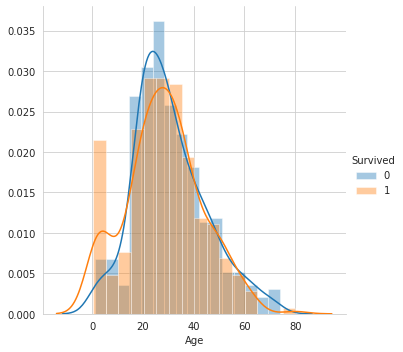

In [57]:
# Univariate analysis - plotting distribution

sns.FacetGrid(train_data, hue="Survived", size=5) \
      .map(sns.distplot, "Age") \
      .add_legend();
plt.show();

In [58]:
train_data['Sex'][(train_data['Sex'] =='female')]=0
train_data['Sex'][(train_data['Sex'] =='male')]=1

test_data['Sex'][(test_data['Sex'] =='female')]=0
test_data['Sex'][(test_data['Sex'] =='male')]=1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


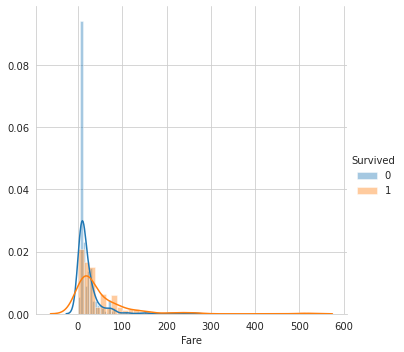

In [59]:
# Univariate analysis - plotting distribution

sns.FacetGrid(train_data, hue="Survived", size=5) \
      .map(sns.distplot, "Fare") \
      .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


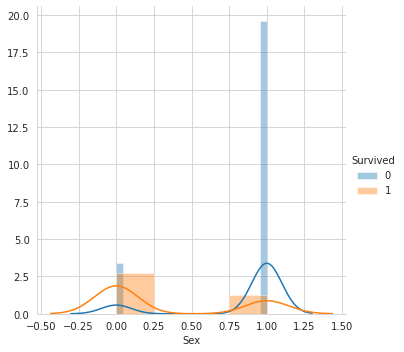

In [60]:
sns.FacetGrid(train_data, hue="Survived", size=5) \
      .map(sns.distplot, "Sex") \
      .add_legend();
plt.show();


In [61]:
include =['Age','Pclass','Fare']
pd.options.mode.chained_assignment = None  # default='warn'
train_data['Age'][(train_data['Age'].isnull()) & (train_data['Sex'] ==1) ]=31
train_data['Age'][(train_data['Age'].isnull()) & (train_data['Sex'] ==0)]=29

test_data['Age'][(test_data['Age'].isnull()) & (test_data['Sex'] ==1) ]=31
test_data['Age'][(test_data['Age'].isnull()) & (test_data['Sex'] ==0)]=29
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
 train_data.Age.describe()

count    891.000000
mean      29.838575
std       13.011449
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

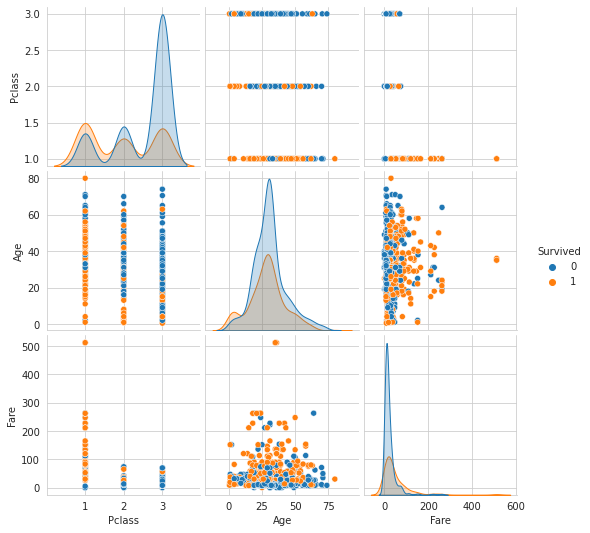

In [63]:
# after we have made the categorical variable 'Survival_Status' as of type 'category', 
# the default sns pairplot won't show that feature now.
sns.pairplot(train_data[["Survived","Pclass","Age","Fare"]], hue="Survived")
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
#sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

In [64]:
## Starting with the modelling
train_data.Embarked.describe()

train_data['Embarked'][(train_data['Embarked'].isnull())]='S'
test_data['Embarked'][(test_data['Embarked'].isnull())]='S'



In [65]:
## Dealing with numerical features
## Age
## Farer  

 


train_data.loc[train_data['Age'] <= 15, 'Age'] = 0
train_data.loc[(train_data['Age'] >= 16) & (train_data['Age'] <= 25), 'Age'] = 1
train_data.loc[(train_data['Age'] >= 26) & (train_data['Age'] <= 35), 'Age'] = 2
train_data.loc[(train_data['Age'] >= 36) & (train_data['Age'] <= 45), 'Age'] = 3
train_data.loc[(train_data['Age'] >= 46) & (train_data['Age'] <= 55), 'Age'] = 4
train_data.loc[(train_data['Age'] >= 56) & (train_data['Age'] <= 65), 'Age'] = 5
train_data.loc[ train_data['Age'] > 64, 'Age']=6
train_data.head()


test_data.loc[test_data['Age'] <= 15, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 25), 'Age'] = 1
test_data.loc[(test_data['Age'] >= 26) & (test_data['Age'] <= 35), 'Age'] = 2
test_data.loc[(test_data['Age'] >= 36) & (test_data['Age'] <= 45), 'Age'] = 3
test_data.loc[(test_data['Age'] >= 46) & (test_data['Age'] <= 55), 'Age'] = 4
test_data.loc[(test_data['Age'] >= 56) & (test_data['Age'] <= 65), 'Age'] = 5
test_data.loc[ test_data['Age'] > 64, 'Age']=6


In [66]:
## Combine Parch and sibSp as TotalFamily
train_data['TotalFamily'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['TotalFamily'] = test_data['SibSp'] + test_data['Parch'] + 1

In [67]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


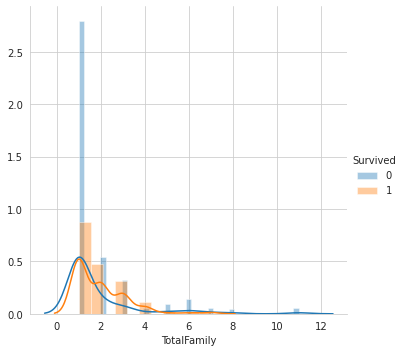

In [68]:
sns.FacetGrid(train_data, hue="Survived", size=5) \
      .map(sns.distplot, "TotalFamily") \
      .add_legend();
plt.show();


In [69]:
train_data = train_data.drop(['Parch', 'SibSp', 'Name','Ticket'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Name', 'Ticket'], axis=1)

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,1,1.0,7.2500,NaN,S,2
1,2,1,1,0,3.0,71.2833,C85,C,2
2,3,1,3,0,2.0,7.9250,NaN,S,1
3,4,1,1,0,2.0,53.1000,C123,S,2
4,5,0,3,1,2.0,8.0500,NaN,S,1


In [71]:
train_data['Fare'].fillna(train_data['Fare'].dropna().median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


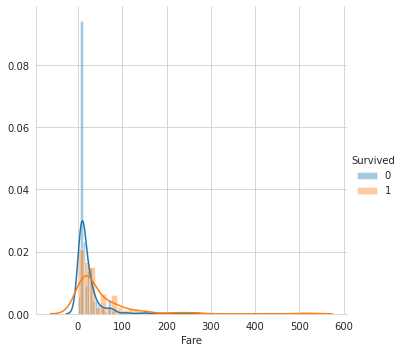

In [72]:
train_data.Fare.describe()

sns.FacetGrid(train_data, hue="Survived", size=5) \
      .map(sns.distplot, "Fare") \
      .add_legend();
plt.show();

In [73]:


train_data.loc[train_data['Fare'] <= 7, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7) & (train_data['Fare'] <= 15), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 15) & (train_data['Fare'] <= 25), 'Fare'] = 2
train_data.loc[(train_data['Fare'] > 25) & (train_data['Fare'] <= 35), 'Fare'] = 3
train_data.loc[ train_data['Fare'] > 35, 'Fare']=4
train_data.head()




test_data.loc[test_data['Fare'] <= 7, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7) & (test_data['Fare'] <= 15), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 15) & (test_data['Fare'] <= 25), 'Fare'] = 2
test_data.loc[(test_data['Fare'] > 25) & (test_data['Fare'] <= 35), 'Fare'] = 3
test_data.loc[ test_data['Fare'] > 35, 'Fare']=4
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,1,1.0,1.0,NaN,S,2
1,2,1,1,0,3.0,4.0,C85,C,2
2,3,1,3,0,2.0,1.0,NaN,S,1
3,4,1,1,0,2.0,4.0,C123,S,2
4,5,0,3,1,2.0,1.0,NaN,S,1


In [74]:
##  handling Embarked

train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [75]:
#train_data = train_data.drop(['Cabin'], axis=1)
#test_data = test_data.drop(['Cabin'], axis=1)

train_data = train_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)

train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [76]:
train_data.head()
x_train=train_data.drop(['Survived'], axis=1)

y_train = train_data['Survived']

x_train.head()

,Pclass,Sex,Age,Fare,Embarked,TotalFamily
0,3,1,1.0,1.0,0,2
1,1,0,3.0,4.0,1,2
2,3,0,2.0,1.0,0,1
3,1,0,2.0,4.0,0,2
4,3,1,2.0,1.0,0,1


In [77]:
test_data.head()


,Pclass,Sex,Age,Fare,Embarked,TotalFamily
0,3,1,2.0,1.0,2,1
1,3,0,4.0,0.0,0,2
2,2,1,5.0,1.0,2,1
3,3,1,2.0,1.0,0,1
4,3,0,1.0,1.0,0,3


In [78]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
#y_test=clf.predict(test_data)
from sklearn.metrics import accuracy_score

y_train_pred=clf.predict(x_train)

from sklearn.metrics import roc_auc_score
train_auc=[]
train_auc.append(roc_auc_score(y_train,y_train_pred))
print(train_auc)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0.794770395935193]
Accuracy: 81.71%


In [80]:


sample_submiss = pd.read_csv("gender_submission.csv")
sample_submiss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


x_train['Sex'] = pd.to_numeric(x_train['Sex'])
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.50%


In [82]:
train_auc_xg=[]
train_auc_xg.append(roc_auc_score(y_train,y_pred_train))
train_auc_xg

[0.8065861374748345]

In [83]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names = ["Model", "ROC_AUC Score", "Accuracy"]
x.add_row(["SVM", 79.47,81.71 ])
x.add_row(["XGBoost", 80.65,83.50])
print(x)

+---------+---------------+----------+
|  Model  | ROC_AUC Score | Accuracy |
+---------+---------------+----------+
|   SVM   |     79.47     |  81.71   |
| XGBoost |     80.65     |   83.5   |
+---------+---------------+----------+


In [84]:
## WE will use XGBOOST to predict the output for test data
test_data.head()
test_data['Sex'] = pd.to_numeric(test_data['Sex'])
y_pred_test = model.predict(test_data)
 

In [85]:
mysubmission['Survived'].value_counts()

0    283
1    135
Name: Survived, dtype: int64

In [87]:

%cd Colab\ Notebooks
mysubmission.to_csv("mysubmission.csv")

[Errno 2] No such file or directory: 'Colab Notebooks'
/content


In [88]:
from sklearn.ensemble import RandomForestClassifier


model =  RandomForestClassifier()

model.fit(x_train, y_train)

pred = model.predict(x_train)

accuracy_score(y_train,pred)



0.8765432098765432

In [95]:
y_pred_rf = model.predict(test_data)

In [98]:
test_data.head()

mysubmission=pd.DataFrame()
#test_data2 = pd.read_csv("test.csv")

mysubmission['PassengerId']=test_data2['PassengerId']
mysubmission['Survived']=y_pred_rf

In [100]:
mysubmission.head(20)


from google.colab import drive
drive.mount('/content/drive')

#%cd drive/My\ Drive
#%cd Colab\ Notebooks
mysubmission.to_csv("mysubmissionrf.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
